In [18]:
import os
#import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame 
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
# import netCDF4
%matplotlib inline

In [19]:
if 'obelix' in os.uname()[1] or 'asterix' in os.uname()[1]:
    env = '/home/estimr2/nhempelmann'
else: 
    env = os.getenv('HOME')
    
DATA_DIR = os.path.join(env+'/data/euclia/ts_bc_cordex/')
os.uname()[1]

'obelix3'

In [20]:
obs = pd.read_csv(os.path.join(env+'/data/euclia/pr_obs.csv'),
#                names = ['Oxford_606','Rothamsted_471','Wisley_719','BognorRegis_782','CambridgeBG_454','Eastbourne_808','EastMalling_744','Goodhurst_742','Hampstead_695','Larkhill_888','OtterbourneWWks_855','WightShanklin_878','Woburn_458'],
                 # usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                 parse_dates = [0],
                 header=[0,1,2],
                 sep=',',
                 keep_date_col = True,
                 # na_values=-999,
                 index_col =[0]
                 )
obs_12 = obs['1912':'2014']
# pr.to_csv(env+'/data/euclia/pr.csv')

In [4]:
pr = pd.read_csv(os.path.join(env+'/data/euclia/pr.csv'),
#                names = ['Oxford_606','Rothamsted_471','Wisley_719','BognorRegis_782','CambridgeBG_454','Eastbourne_808','EastMalling_744','Goodhurst_742','Hampstead_695','Larkhill_888','OtterbourneWWks_855','WightShanklin_878','Woburn_458'],
                 # usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                 parse_dates = [0],
                 header=[0,1,2,3,4,5,6,],
                 sep=',',
                 keep_date_col = True,
                 # na_values=-999,
                 index_col =[0]
                 )

In [5]:
import statsmodels.api as sm
import matplotlib.dates as mdates

def fit_line2(x, y):
    """Return slope, intercept of best fit line."""
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0]

In [6]:

#plt.plot(points, m*points + b)

In [7]:
#type(nd[0])

In [8]:
regions = ['south_UK', 'west_FRA']
colors = ['blue', 'green']
start = dt.datetime.strptime('1910','%Y') # dt.datetime.strptime('195412','%Y%m') #19541201
end = dt.datetime.strptime('2101','%Y') # dt.datetime.strptime('210012','%Y%m')
year_ticks = pd.date_range(start, end , freq='10A', )

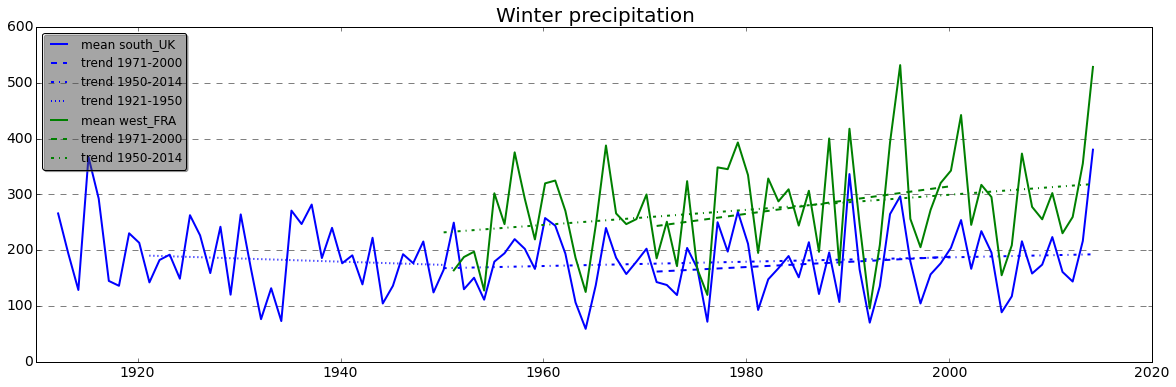

In [9]:
fig = plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

for region in regions:
    if region == 'south_UK':
        c= colors[0]
    if region == 'west_FRA':
        c= colors[1]
        
    plt.plot(obs_12.index, obs_12.xs([region], level=['region'], axis=1).mean(axis=1), 
             label='mean %s ' % (region) ,linewidth=2, c = c )
        
    nd = obs_12['1971':'2000'].index.to_pydatetime()
    x = mdates.date2num(nd)
    N = len(x)
    y = obs_12['1971':'2000'].xs([region], level=['region'], axis=1).mean(axis=1).values
    m, b = fit_line2(x, y)
    points = np.linspace(x.min(), x.max(), N)    
    plt.plot(points, m*points + b,linewidth=2, linestyle='dashed', c = c , label='trend 1971-2000')

    nd = obs_12['1950':'2014'].index.to_pydatetime()
    x = mdates.date2num(nd)
    N = len(x)
    y = obs_12['1950':'2014'].xs([region], level=['region'], axis=1).mean(axis=1).values
    m, b = fit_line2(x, y)
    points = np.linspace(x.min(), x.max(), N)    
    plt.plot(points, m*points + b,linewidth=2, linestyle='-.', c = c , label='trend 1950-2014')
    
    
    if region == 'south_UK':
        nd = obs_12['1921':'1950'].index.to_pydatetime()
        x = mdates.date2num(nd)
        N = len(x)
        y = obs_12['1921':'1950'].xs([region], level=['region'], axis=1).mean(axis=1).values
        m, b = fit_line2(x, y)
        points = np.linspace(x.min(), x.max(), N)
        plt.plot(points, m*points + b,linewidth=2, linestyle='dotted', c = c , label='trend 1921-1950')
    
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True)
plt.hlines(range(0,700,100), start , dt.datetime.strptime('2020','%Y') , linestyle='--', alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Winter precipitation', fontsize=20)

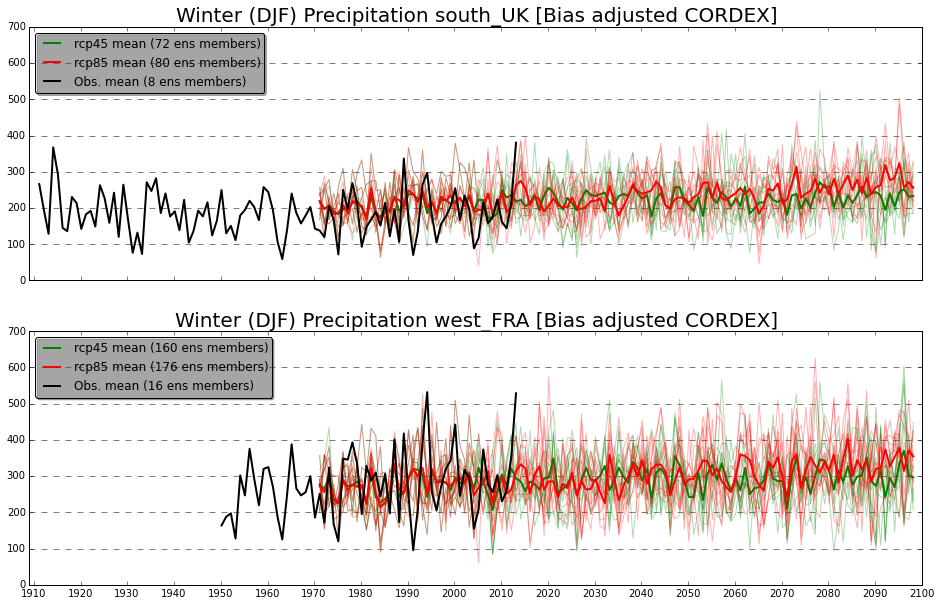

In [10]:
f, axarr = plt.subplots(2, sharex=True, figsize=(16, 10))

c=0
con = []
miss = 0 
for region in regions: # 
        for rcp in pr.columns.levels[1]:
            if rcp == 'rcp45':
                color = 'green'
            if rcp == 'rcp85':
                color = 'red'    
               
            em = np.shape(pr.xs([region, rcp], level=['region','rcp'], axis=1))[1]
            axarr[c].plot(pr.index, pr.xs([region, rcp], level=['region','rcp'], axis=1).mean(axis=1), 
                          label= '%s mean (%i ens members)' % (rcp, em) , color=color, linewidth=2)

            for gcm in pr.columns.levels[4]:
                for rcm in pr.columns.levels[5]:
                    y = pr.xs([region, rcp, gcm, rcm], 
                                                  level=['region','rcp','gcm', 'rcm' ],
                                                  axis=1).mean(axis=1)
                    
                    axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                    if not np.all(np.isnan(y)):
                        con.extend(y)
                        miss= miss+1                        

        em_obs = np.shape(obs_12.xs([region], level=['region'], axis=1))[1]
        axarr[c].plot(obs_12.index, obs_12.xs([region], level=['region'], axis=1).mean(axis=1), c='black', 
                      label= 'Obs. mean (%i ens members)' % (em_obs) ,linewidth=2)

        axarr[c].legend(loc='upper left', ncol=1, fancybox=True, shadow=True) # bbox_to_anchor=(1.1 , 1.00)
        axarr[c].set_title('Winter (DJF) Precipitation %s [Bias adjusted CORDEX]' % (region), fontsize=20)
        axarr[c].hlines(range(0,700,100), start , end , linestyle='--', alpha=0.5)
        axarr[c].set_ylim(0,700)
        
        axarr[c].set_xticks(year_ticks)
        axarr[c].set_xlim(start,end)
        
        c=+1
        #axarr.set_title

In [11]:
for region in regions: # 
        for rcp in pr.columns.levels[1]:
            if rcp == 'rcp45':
                color = 'green'
            if rcp == 'rcp85':
                color = 'red'    
               
            em = np.shape(pr.xs([region, rcp], level=['region','rcp'], axis=1))[1]
            axarr[c].plot(pr.index, pr.xs([region, rcp], level=['region','rcp'], axis=1).mean(axis=1), 
                          label= '%s mean (%i ens members)' % (rcp, em) , color=color, linewidth=2)

            for gcm in pr.columns.levels[4]:
                for rcm in pr.columns.levels[5]:
                    y = pr.xs([region, rcp, gcm, rcm], 
                                                  level=['region','rcp','gcm', 'rcm' ],
                                                  axis=1).mean(axis=1)
                    
                    axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                    if not np.all(np.isnan(y)):
                        print '|  %s  \t %s   \t %s  \t %s \t| ' % (region,rcp ,gcm, rcm)

|  south_UK  	 rcp45   	 CNRM-CERFACS-CNRM-CM5  	 RCA4 	| 
|  south_UK  	 rcp45   	 CNRM-CM5  	 CCLM4-8-17 	| 
|  south_UK  	 rcp45   	 ICHEC-EC-EARTH  	 HIRHAM5 	| 
|  south_UK  	 rcp45   	 ICHEC-EC-EARTH  	 RCA4 	| 
|  south_UK  	 rcp45   	 IPSL-IPSL-CM5A-MR  	 WRF331F 	| 
|  south_UK  	 rcp45   	 MOHC-HadGEM2-ES  	 RCA4 	| 
|  south_UK  	 rcp45   	 MPI-ESM-LR  	 CCLM4-8-17 	| 
|  south_UK  	 rcp45   	 MPI-ESM-LR  	 REMO019 	| 
|  south_UK  	 rcp45   	 MetEir-ECEARTH  	 RACMO22E 	| 
|  south_UK  	 rcp85   	 CNRM-CERFACS-CNRM-CM5  	 RCA4 	| 
|  south_UK  	 rcp85   	 ICHEC-EC-EARTH  	 HIRHAM5 	| 
|  south_UK  	 rcp85   	 ICHEC-EC-EARTH  	 RCA4 	| 
|  south_UK  	 rcp85   	 IPSL-IPSL-CM5A-MR  	 RCA4 	| 
|  south_UK  	 rcp85   	 IPSL-IPSL-CM5A-MR  	 WRF331F 	| 
|  south_UK  	 rcp85   	 MOHC-HadGEM2-ES  	 RCA4 	| 
|  south_UK  	 rcp85   	 MPI-ESM-LR  	 CCLM4-8-17 	| 
|  south_UK  	 rcp85   	 MPI-ESM-LR  	 REMO019 	| 
|  south_UK  	 rcp85   	 MPI-M-MPI-ESM-LR  	 RCA4 	| 
|  south_UK  	 rcp8

In [12]:
pr.xs(['south_UK', 'rcp45', 'CNRM-CERFACS-CNRM-CM5', 'CCLM4-8-17'],
      level=['region','rcp','gcm', 'rcm'], axis=1).sum(axis = 1).head()

Date
1972-02-29    0
1973-02-28    0
1974-02-28    0
1975-02-28    0
1976-02-27    0
dtype: float64

In [13]:
DATA_DIR

'/home/estimr2/nhempelmann/data/euclia/ts_bc_cordex/'

In [14]:
add_path = os.getenv('HOME')+'/birdhouse/flyingpigeon/flyingpigeon/'
add_path

'/home/users/nhempel/birdhouse/flyingpigeon/flyingpigeon/'

In [15]:
# Returntimes 
import sys
sys.path.append(os.getenv('HOME')+'/birdhouse/flyingpigeon/flyingpigeon/')

import extremevents as ev

In [16]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

In [21]:
reload(ev)

<module 'extremevents' from '/home/users/nhempel/birdhouse/flyingpigeon/flyingpigeon/extremevents.pyc'>

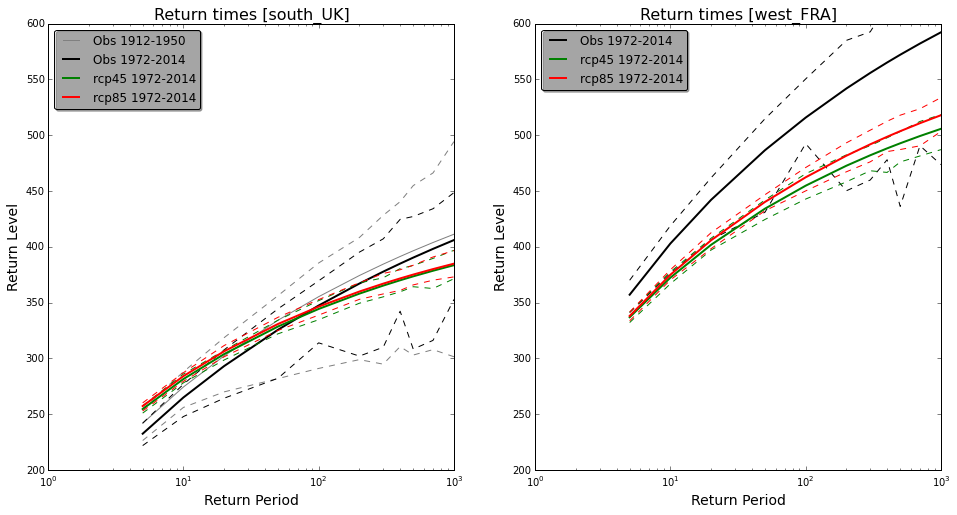

In [33]:
f, axarr = plt.subplots(1, 2, sharex=True, figsize=(16, 8))
c=0
period = '2071-2100'
starts = [1912,1972,2001,2030,2070]
ends   = [1950,2014,2030,2065,2099]
# x = [ 5 ,10 ,20, 50 ,100 ,200, 300, 400 ,500 ,1000 ]
for region  in regions:
    if 'south_UK' in region:
        obs = list(obs_12['1912':'1950'].xs([region], level=['region'], axis=1).mean(axis=1).values )#
        rl = ev.eventdistribution(obs)
        x = rl[0]
        color = 'grey'
        axarr[c].plot(x,rl[2], c=color , label= 'Obs 1912-1950')
        axarr[c].plot(x,rl[1], c=color , linestyle='--' )
        axarr[c].plot(x,rl[3], c=color , linestyle='--' )
        
    obs = list(obs_12['1955':'2014'].xs([region], level=['region'], axis=1).mean(axis=1).values )#
    rl = ev.eventdistribution(obs)
    x = rl[0]
    color = 'black'
    axarr[c].plot(x,rl[2] , c=color, linewidth=2, label= 'Obs 1972-2014' )
    axarr[c].plot(x,rl[1], c=color , linestyle='--' )
    axarr[c].plot(x,rl[3], c=color , linestyle='--' )
 
    for rcp in pr.columns.levels[1]:
        if rcp == 'rcp45':
            color = 'green'
        if rcp == 'rcp85':
            color = 'red'    
        con = []
        for gcm in pr.columns.levels[4]:
            for rcm in pr.columns.levels[5]:
                y = pr['1972':'2014'].xs([region, rcp, gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                if not np.all(np.isnan(y)):
                    con.extend(y)
                    miss= miss+1     
        rl = ev.eventdistribution(con)
        x = rl[0]
        
        axarr[c].plot(x,rl[2], c=color,  linewidth=2, label= '%s 1972-2014' % (rcp))
        axarr[c].plot(x,rl[1], c=color , linestyle='--' )
        axarr[c].plot(x,rl[3], c=color , linestyle='--' )##
#
#    for rcp in pr.columns.levels[1]:
#        if rcp == 'rcp45':
#            color = 'green'
#        if rcp == 'rcp85':
#            color = 'red'    
#        con = []
#        for gcm in pr.columns.levels[4]:
#            for rcm in pr.columns.levels[5]:
#                y = pr['2071':'2100'].xs([region, rcp, gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
#                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
#                if not np.all(np.isnan(y)):
#                    con.extend(y)
#                    miss= miss+1     
#        rl = ev.eventdistribution(con)
#        x = rl[0]
#        color='green'
#        axarr[c].plot(x,rl[2], c=color, linestyle='--', linewidth=2, label= '%s 2070-2099' % (rcp)) 
#        axarr[c].plot(x,rl[1], c=c , linestyle='--' )
#        axarr[c].plot(x,rl[3], c=c , linestyle='--' )
        
    axarr[c].set_title('Return times [%s]' % (region), fontsize=16)
    axarr[c].set_ylim(200,600)
    #axarr[c].set_xlim(-100,1000)
    axarr[c].legend(loc='upper left', ncol=1, fancybox=True, shadow=True)
    axarr[c].set_xscale("log")
    axarr[c].set_xlabel('Return Period', fontsize=14 )
    axarr[c].set_ylabel('Return Level' , fontsize=14 )
    c=+1

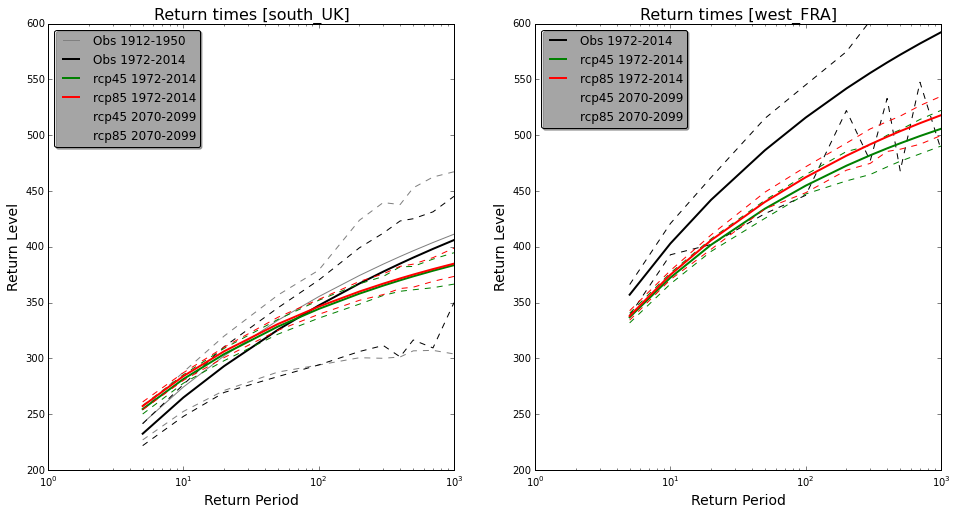

In [39]:
f, axarr = plt.subplots(1, 2, sharex=True, figsize=(16, 8))
c=0
period = '2071-2100'
starts = [1912,1972,2001,2030,2070]
ends   = [1950,2014,2030,2065,2099]
# x = [ 5 ,10 ,20, 50 ,100 ,200, 300, 400 ,500 ,1000 ]
for region  in regions:
    if 'south_UK' in region:
        obs = list(obs_12['1912':'1950'].xs([region], level=['region'], axis=1).mean(axis=1).values )#
        rl = ev.eventdistribution(obs)
        x = rl[0]
        color = 'grey'
        axarr[c].plot(x,rl[2], c=color , label= 'Obs 1912-1950')
        axarr[c].plot(x,rl[1], c=color , linestyle='--' )
        axarr[c].plot(x,rl[3], c=color , linestyle='--' )
    
    obs = list(obs_12['1955':'2014'].xs([region], level=['region'], axis=1).mean(axis=1).values )#
    rl = ev.eventdistribution(obs)
    x = rl[0]
    color = 'black'
    axarr[c].plot(x,rl[2] , c=color, linewidth=2, label= 'Obs 1972-2014' )
    axarr[c].plot(x,rl[1], c=color , linestyle='--' )
    axarr[c].plot(x,rl[3], c=color , linestyle='--' )
        
    for rcp in pr.columns.levels[1]:
        if rcp == 'rcp45':
            color = 'green'
        if rcp == 'rcp85':
            color = 'red'    
        con = []
        for gcm in pr.columns.levels[4]:
            for rcm in pr.columns.levels[5]:
                y = pr['1972':'2014'].xs([region, rcp, gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                if not np.all(np.isnan(y)):
                    con.extend(y)
                    miss= miss+1     
        rl = ev.eventdistribution(con)
        x = rl[0]
        
        axarr[c].plot(x,rl[2], c=color,  linewidth=2, label= '%s 1972-2014' % (rcp))
        axarr[c].plot(x,rl[1], c=color , linestyle='--' )
        axarr[c].plot(x,rl[3], c=color , linestyle='--' )

#    for rcp in pr.columns.levels[1]:
#        if rcp == 'rcp45':
#            color = 'green'
#        if rcp == 'rcp85':
#            color = 'red'    
#        con = []
#        for gcm in pr.columns.levels[4]:
#            for rcm in pr.columns.levels[5]:
#                y = pr['2001':'2030'].xs([region, rcp, gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
#                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
#                if not np.all(np.isnan(y)):
#                    con.extend(y)
#                    miss= miss+1     
#        rl = ev.eventdistribution(con)
#        x = rl[0]
#        axarr[c].plot(x,rl[1], linestyle=':', c=color,  linewidth=2, label= '%s 2001-2030' % (rcp)) 

#    for rcp in pr.columns.levels[1]:
#        if rcp == 'rcp45':
#            color = 'green'
#        if rcp == 'rcp85':
#            color = 'red'    
#        con = []
#        for gcm in pr.columns.levels[4]:
#            for rcm in pr.columns.levels[5]:
#                y = pr['2036':'2065'].xs([region, rcp, gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
#                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
#                if not np.all(np.isnan(y)):
#                    con.extend(y)
#                    miss= miss+1     
#        rl = ev.eventdistribution(con)
#        x = rl[0]
#        axarr[c].plot(x,rl[2], linestyle='-.', c=color,  linewidth=2,  label= '%s 2036-2065' % (rcp)) 

    for rcp in pr.columns.levels[1]:
        if rcp == 'rcp45':
            color = 'green'
        if rcp == 'rcp85':
            color = 'red'    
        con = []
        for gcm in pr.columns.levels[4]:
            for rcm in pr.columns.levels[5]:
                y = pr['2071':'2100'].xs([region, rcp, gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                if not np.all(np.isnan(y)):
                    con.extend(y)
                    miss= miss+1     
        rl = ev.eventdistribution(con)
        x = rl[0]
        axarr[c].plot(x,rl[2], c=color,  linestyle='.' , linewidth=2, label= '%s 2070-2099' % (rcp)) 
        axarr[c].plot(x,rl[1], c=color , linestyle='.' )
        axarr[c].plot(x,rl[3], c=color , linestyle='.' )
        
    axarr[c].set_title('Return times [%s]' % (region), fontsize=16)
    axarr[c].set_ylim(200,600)
    #axarr[c].set_xlim(-100,1000)
    axarr[c].legend(loc='upper left', ncol=1, fancybox=True, shadow=True)
    axarr[c].set_xscale("log")
    axarr[c].set_xlabel('Return Period', fontsize=14 )
    axarr[c].set_ylabel('Return Level' , fontsize=14 )
    c=+1

In [ ]:
ev.rl_bootstrap(con, 100, nsim=10)

In [ ]:
starts = [1912,1972,2001,2030,2070]
ends   = [1950,2014,2030,2065,2099]

In [ ]:
rp = [ 5. ,10. ,20., 50. ,100. ,200., 300., 400. ,500. ,1000. ]
test = []
for T in rp:
    test = np.concatenate((test, starts), axis=1)
test

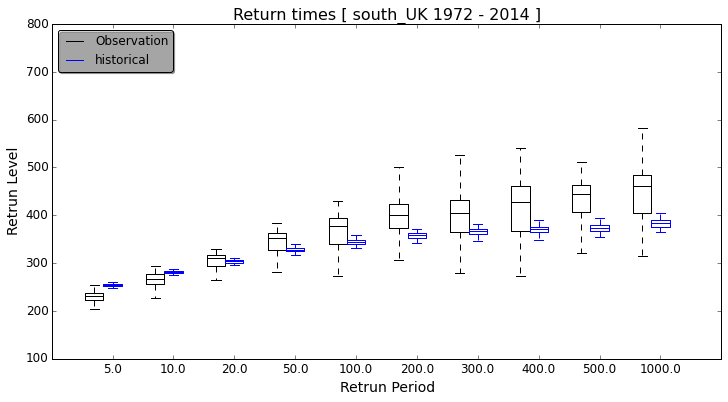

In [12]:
#First plot: (evaluation of models)
#-------------
#Observation from 1971 to 2014
#CORDEX for the same period, using HISTORICAL runs until 2005 and extending them until 2014 with RCP4.5 or if it does not exist RCP8.5. You should use all the ensemble so fore the 44 year period you should have in fact about 500 years.

rp = [ 5. ,10. ,20., 50. ,100. ,200., 300., 400. ,500. ,1000. ]
rl_c_obs = []
rl_c_rcp45 = []
rl_c_rcp85 = []
c = 0

start = 1972
end = 2014
region = 'south_UK' # 
#region = 'west_FRA'


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

for T in rp :
    obs = list(obs_12['%i' % (start):'%i' % (end)].xs([region], level=['region'], axis=1).mean(axis=1).values )#
    rl_obs = ev.rl_bootstrap(obs,T)

    for rcp in pr.columns.levels[1]:
        con = []
        for gcm in pr.columns.levels[4]:
            for rcm in pr.columns.levels[5]:
                y = pr['%i' % (start):'%i' % (end)].xs([region, rcp , gcm, rcm], 
                         level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                if not np.all(np.isnan(y)):
                    con.extend(y)
                    miss= miss+1     
        if '85' in rcp: 
            rl_rcp85 = ev.rl_bootstrap(con,T)
        elif '45' in rcp:
            rl_rcp45 = ev.rl_bootstrap(con,T)
        else: 
            print 'no rcp found'
    if c == 0:        
        rl_c_obs =  rl_obs
        rl_c_rcp45 = rl_rcp45
        rl_c_rcp85 = rl_rcp85
    if c > 0:
        rl_c_obs = np.vstack((rl_c_obs, rl_obs))
        rl_c_rcp45 = np.vstack((rl_c_rcp45, rl_rcp45))
        rl_c_rcp85 = np.vstack((rl_c_rcp85, rl_rcp85))
    c=+1

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(12, 6))

bpl = plt.boxplot(list(rl_c_obs), positions=np.array(xrange(len(rl_c_obs)))*2.0-0.6, sym='', widths=0.6)
bpm = plt.boxplot(list(rl_c_rcp45), positions=np.array(xrange(len(rl_c_obs)))*2.0, sym='', widths=0.6)
#bpr = plt.boxplot(list(rl_c_rcp85), positions=np.array(xrange(len(rl_c_obs)))*2.0+0.4, sym='', widths=0.4)
set_box_color(bpl, 'black') # colors are from http://colorbrewer2.org/
set_box_color(bpm, 'blue')
#set_box_color(bpr, 'red')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='black', label='Observation')
plt.plot([], c='blue', label='historical')
#plt.plot([], c='green', label='rcp45')
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True)

plt.xticks(xrange(0, len(rp) * 2, 2), rp, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-2, len(rp)*2)
plt.ylim(100, 800)

plt.title('Return times [ %s %i - %i ]' % (region, start, end), fontsize=16)
plt.xlabel('Retrun Period', fontsize=14)
plt.ylabel('Retrun Level', fontsize=14)
# plt.tight_layout()

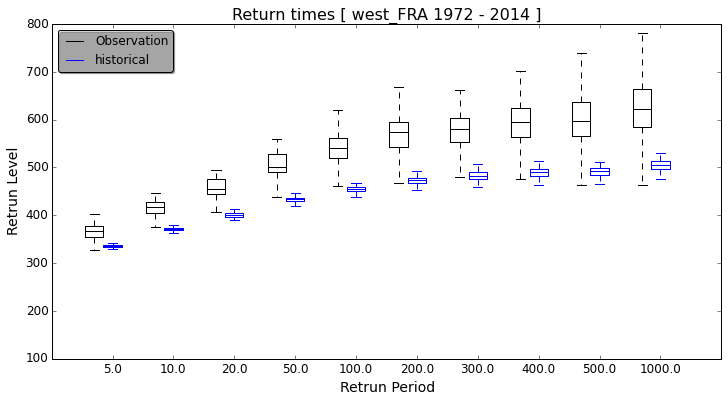

In [26]:
#First plot: (evaluation of models)
#-------------
#Observation from 1971 to 2014
#CORDEX for the same period, using HISTORICAL runs until 2005 and extending them until 2014 with RCP4.5 or if it does not exist RCP8.5. You should use all the ensemble so fore the 44 year period you should have in fact about 500 years.

rp = [ 5. ,10. ,20., 50. ,100. ,200., 300., 400. ,500. ,1000. ]
rl_c_obs = []
rl_c_rcp45 = []
rl_c_rcp85 = []
c = 0
s = 0
start = 1972
end = 2014
#region = 'south_UK' # 
region = 'west_FRA'

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

for T in rp :
    obs = list(obs_12['%i' % (start):'%i' % (end)].xs([region], level=['region'], axis=1).mean(axis=1).values )#
    rl_obs = ev.rl_bootstrap(obs,T)

    for rcp in pr.columns.levels[1]:
        con = []
        for gcm in pr.columns.levels[4]:
            for rcm in pr.columns.levels[5]:
                y = pr['%i' % (start):'%i' % (end)].xs([region, rcp , gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                if not np.all(np.isnan(y)):
                    con.extend(y)
                    miss= miss+1     
        if '85' in rcp: 
            rl_rcp85 = ev.rl_bootstrap(con,T)
        elif '45' in rcp:
            rl_rcp45 = ev.rl_bootstrap(con,T)
        else: 
            print 'no rcp found'
    if c == 0:        
        rl_c_obs =  rl_obs
        rl_c_rcp45 = rl_rcp45
        rl_c_rcp85 = rl_rcp85
    if c > 0:
        rl_c_obs = np.vstack((rl_c_obs, rl_obs))
        rl_c_rcp45 = np.vstack((rl_c_rcp45, rl_rcp45))
        rl_c_rcp85 = np.vstack((rl_c_rcp85, rl_rcp85))
    c=+1

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(12, 6))

bpl = plt.boxplot(list(rl_c_obs), positions=np.array(xrange(len(rl_c_obs)))*2.0-0.6, sym='', widths=0.6)
bpm = plt.boxplot(list(rl_c_rcp45), positions=np.array(xrange(len(rl_c_obs)))*2.0, sym='', widths=0.6)
#bpr = plt.boxplot(list(rl_c_rcp85), positions=np.array(xrange(len(rl_c_obs)))*2.0+0.4, sym='', widths=0.4)
set_box_color(bpl, 'black') # colors are from http://colorbrewer2.org/
set_box_color(bpm, 'blue')
#set_box_color(bpr, 'red')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='black', label='Observation')
plt.plot([], c='blue', label='historical')
#plt.plot([], c='green', label='rcp45')
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True)

plt.xticks(xrange(0, len(rp) * 2, 2), rp, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-2, len(rp)*2)
plt.ylim(100, 800)

plt.title('Return times [ %s %i - %i ]' % (region, start, end), fontsize=16)
plt.xlabel('Retrun Period', fontsize=14)
plt.ylabel('Retrun Level', fontsize=14)
# plt.tight_layout()
s=+1    

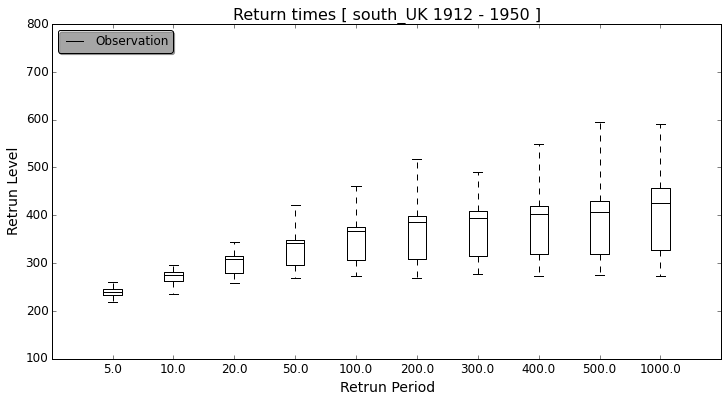

In [34]:
# For UK, you can also look at early century (1912-1950)
rp = [ 5. ,10. ,20., 50. ,100. ,200., 300., 400. ,500. ,1000. ]
rl_c_obs = []
rl_c_rcp45 = []
rl_c_rcp85 = []
c = 0
s = 0
start = 1912
end = 1950
region = 'south_UK' # 
#region = 'west_FRA'

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

for T in rp :
    obs = list(obs_12['%i' % (start):'%i' % (end)].xs([region], level=['region'], axis=1).mean(axis=1).values )#
    rl_obs = ev.rl_bootstrap(obs,T)
    if c == 0:        
        rl_c_obs =  rl_obs
    if c > 0:
        rl_c_obs = np.vstack((rl_c_obs, rl_obs))
    c=+1    

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)


fig = plt.figure(figsize=(12, 6))

bpl = plt.boxplot(list(rl_c_obs), positions=np.array(xrange(len(rl_c_obs)))*2.0 , sym='', widths=0.6)
#bpm = plt.boxplot(list(rl_c_rcp45), positions=np.array(xrange(len(rl_c_obs)))*2.0, sym='', widths=0.6)
#bpr = plt.boxplot(list(rl_c_rcp85), positions=np.array(xrange(len(rl_c_obs)))*2.0+0.4, sym='', widths=0.4)
set_box_color(bpl, 'black') # colors are from http://colorbrewer2.org/
#set_box_color(bpm, 'blue')
#set_box_color(bpr, 'red')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='black', label='Observation')
#plt.plot([], c='blue', label='historical')
#plt.plot([], c='green', label='rcp45')
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True)

plt.xticks(xrange(0, len(rp) * 2, 2), rp, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-2, len(rp)*2)
plt.ylim(100, 800)

plt.title('Return times [ %s %i - %i ]' % (region, start, end), fontsize=16)
plt.xlabel('Retrun Period', fontsize=14)
plt.ylabel('Retrun Level', fontsize=14)
# plt.tight_layout()
s=+1

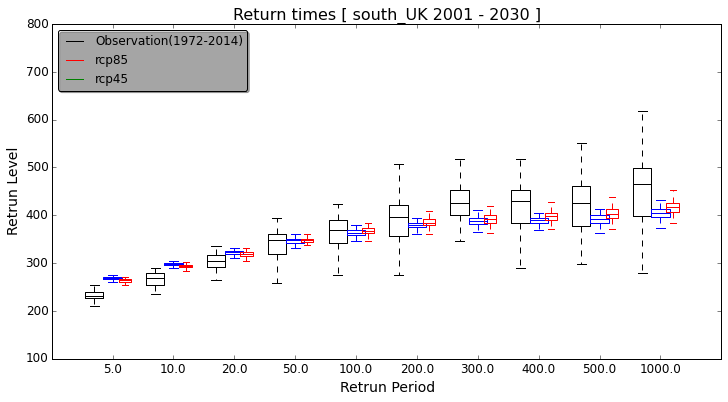

In [27]:
# Second plot: (comparing past obs period with the real "current" centered period which is eg 2001-2030):
# * plot CORDEX 1971 to 2014 as above together with HIST(2001-2005)+RCP4.5(2006-2030) and 
# HIST(2001-2005)+RCP8.5(2006-2030) for the same models of course. This should show how we "mis-estimate" the current risks using past observations


rp = [ 5. ,10. ,20., 50. ,100. ,200., 300., 400. ,500. ,1000. ]
rl_c_obs = []
rl_c_rcp45 = []
rl_c_rcp85 = []
c = 0

start = 2001
end = 2030
region = 'south_UK' # 
#region = 'west_FRA'


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

for T in rp :
    obs = list(obs_12['1972':'2014'].xs([region], level=['region'], axis=1).mean(axis=1).values )#
    rl_obs = ev.rl_bootstrap(obs,T)

    for rcp in pr.columns.levels[1]:
        con = []
        for gcm in pr.columns.levels[4]:
            for rcm in pr.columns.levels[5]:
                y = pr['%i' % (start):'%i' % (end)].xs([region, rcp , gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                if not np.all(np.isnan(y)):
                    con.extend(y)
                    miss= miss+1     
        if '85' in rcp: 
            rl_rcp85 = ev.rl_bootstrap(con,T)
        elif '45' in rcp:
            rl_rcp45 = ev.rl_bootstrap(con,T)
        else: 
            print 'no rcp found'
    if c == 0:        
        rl_c_obs =  rl_obs
        rl_c_rcp45 = rl_rcp45
        rl_c_rcp85 = rl_rcp85
    if c > 0:
        rl_c_obs = np.vstack((rl_c_obs, rl_obs))
        rl_c_rcp45 = np.vstack((rl_c_rcp45, rl_rcp45))
        rl_c_rcp85 = np.vstack((rl_c_rcp85, rl_rcp85))
    c=+1

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(12, 6))

bpl = plt.boxplot(list(rl_c_obs), positions=np.array(xrange(len(rl_c_obs)))*2.0-0.6, sym='', widths=0.6)
bpm = plt.boxplot(list(rl_c_rcp45), positions=np.array(xrange(len(rl_c_obs)))*2.0, sym='', widths=0.6)
bpr = plt.boxplot(list(rl_c_rcp85), positions=np.array(xrange(len(rl_c_obs)))*2.0+0.4, sym='', widths=0.4)
set_box_color(bpl, 'black') # colors are from http://colorbrewer2.org/
set_box_color(bpm, 'green')
set_box_color(bpr, 'red')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='black', label='Observation(1972-2014)')
plt.plot([], c='red', label='rcp85')
plt.plot([], c='green', label='rcp45')
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True)

plt.xticks(xrange(0, len(rp) * 2, 2), rp, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-2, len(rp)*2)
plt.ylim(100, 800)

plt.title('Return times [ %s %i - %i ]' % (region, start, end), fontsize=16)
plt.xlabel('Retrun Period', fontsize=14)
plt.ylabel('Retrun Level', fontsize=14)
# plt.tight_layout()


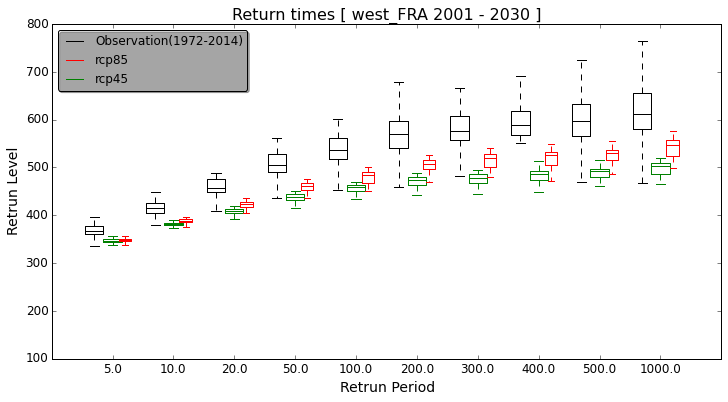

In [31]:

rp = [ 5. ,10. ,20., 50. ,100. ,200., 300., 400. ,500. ,1000. ]
rl_c_obs = []
rl_c_rcp45 = []
rl_c_rcp85 = []
c = 0

start = 2001
end = 2030
#region = 'south_UK' # 
region = 'west_FRA'

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

for T in rp :
    obs = list(obs_12['1972':'2014'].xs([region], level=['region'], axis=1).mean(axis=1).values )#
    rl_obs = ev.rl_bootstrap(obs,T)

    for rcp in pr.columns.levels[1]:
        con = []
        for gcm in pr.columns.levels[4]:
            for rcm in pr.columns.levels[5]:
                y = pr['%i' % (start):'%i' % (end)].xs([region, rcp , gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                if not np.all(np.isnan(y)):
                    con.extend(y)
                    miss= miss+1     
        if '85' in rcp: 
            rl_rcp85 = ev.rl_bootstrap(con,T)
        elif '45' in rcp:
            rl_rcp45 = ev.rl_bootstrap(con,T)
        else: 
            print 'no rcp found'
    if c == 0:        
        rl_c_obs =  rl_obs
        rl_c_rcp45 = rl_rcp45
        rl_c_rcp85 = rl_rcp85
    if c > 0:
        rl_c_obs = np.vstack((rl_c_obs, rl_obs))
        rl_c_rcp45 = np.vstack((rl_c_rcp45, rl_rcp45))
        rl_c_rcp85 = np.vstack((rl_c_rcp85, rl_rcp85))
    c=+1

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(12, 6))

bpl = plt.boxplot(list(rl_c_obs), positions=np.array(xrange(len(rl_c_obs)))*2.0-0.6, sym='', widths=0.6)
bpm = plt.boxplot(list(rl_c_rcp45), positions=np.array(xrange(len(rl_c_obs)))*2.0, sym='', widths=0.6)
bpr = plt.boxplot(list(rl_c_rcp85), positions=np.array(xrange(len(rl_c_obs)))*2.0+0.4, sym='', widths=0.4)
set_box_color(bpl, 'black') # colors are from http://colorbrewer2.org/
set_box_color(bpm, 'green')
set_box_color(bpr, 'red')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='black', label='Observation(1972-2014)')
plt.plot([], c='red', label='rcp85')
plt.plot([], c='green', label='rcp45')
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True)

plt.xticks(xrange(0, len(rp) * 2, 2), rp, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-2, len(rp)*2)
plt.ylim(100, 800)

plt.title('Return times [ %s %i - %i ]' % (region, start, end), fontsize=16)
plt.xlabel('Retrun Period', fontsize=14)
plt.ylabel('Retrun Level', fontsize=14)
# plt.tight_layout()

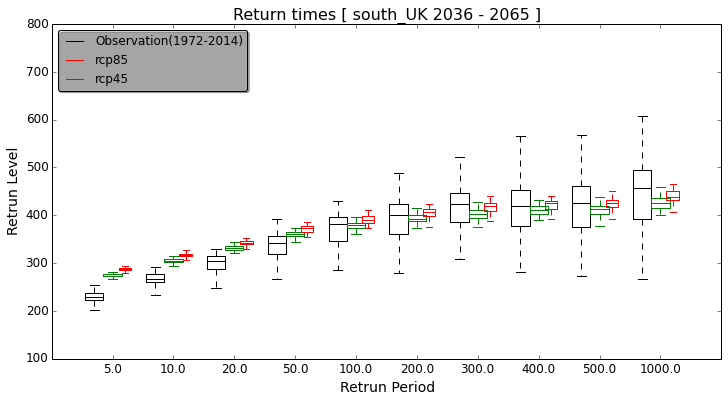

In [29]:
# Third plot: (comparing current with future periods)
# * plot CORDEX today probabilities (2001-2030) together with future probabilities 
# (2036-2065) 
# and (2070-2099) for the two RCPs 

rp = [ 5. ,10. ,20., 50. ,100. ,200., 300., 400. ,500. ,1000. ]
rl_c_obs = []
rl_c_rcp45 = []
rl_c_rcp85 = []
c = 0

start = 2036
end = 2065
region = 'south_UK' # 
#region = 'west_FRA'


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

for T in rp :
    obs = list(obs_12['1972':'2014'].xs([region], level=['region'], axis=1).mean(axis=1).values )#
    rl_obs = ev.rl_bootstrap(obs,T)

    for rcp in pr.columns.levels[1]:
        con = []
        for gcm in pr.columns.levels[4]:
            for rcm in pr.columns.levels[5]:
                y = pr['%i' % (start):'%i' % (end)].xs([region, rcp , gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                if not np.all(np.isnan(y)):
                    con.extend(y)
                    miss= miss+1     
        if '85' in rcp: 
            rl_rcp85 = ev.rl_bootstrap(con,T)
        elif '45' in rcp:
            rl_rcp45 = ev.rl_bootstrap(con,T)
        else: 
            print 'no rcp found'
    if c == 0:        
        rl_c_obs =  rl_obs
        rl_c_rcp45 = rl_rcp45
        rl_c_rcp85 = rl_rcp85
    if c > 0:
        rl_c_obs = np.vstack((rl_c_obs, rl_obs))
        rl_c_rcp45 = np.vstack((rl_c_rcp45, rl_rcp45))
        rl_c_rcp85 = np.vstack((rl_c_rcp85, rl_rcp85))
    c=+1

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(12, 6))

bpl = plt.boxplot(list(rl_c_obs), positions=np.array(xrange(len(rl_c_obs)))*2.0-0.6, sym='', widths=0.6)
bpm = plt.boxplot(list(rl_c_rcp45), positions=np.array(xrange(len(rl_c_obs)))*2.0, sym='', widths=0.6)
bpr = plt.boxplot(list(rl_c_rcp85), positions=np.array(xrange(len(rl_c_obs)))*2.0+0.4, sym='', widths=0.4)
set_box_color(bpl, 'black') # colors are from http://colorbrewer2.org/
set_box_color(bpm, 'green')
set_box_color(bpr, 'red')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='black', label='Observation(1972-2014)')
plt.plot([], c='red', label='rcp85')
plt.plot([], c='green', label='rcp45')
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True)

plt.xticks(xrange(0, len(rp) * 2, 2), rp, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-2, len(rp)*2)
plt.ylim(100, 800)

plt.title('Return times [ %s %i - %i ]' % (region, start, end), fontsize=16)
plt.xlabel('Retrun Period', fontsize=14)
plt.ylabel('Retrun Level', fontsize=14)
# plt.tight_layout()



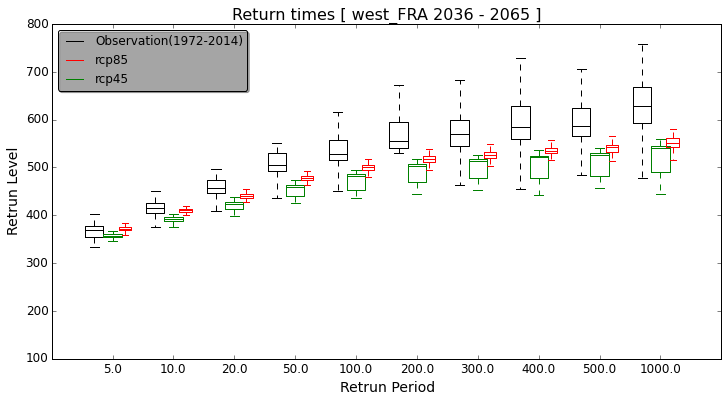

In [30]:
rp = [ 5. ,10. ,20., 50. ,100. ,200., 300., 400. ,500. ,1000. ]
rl_c_obs = []
rl_c_rcp45 = []
rl_c_rcp85 = []
c = 0

start = 2036
end = 2065
#region = 'south_UK' # 
region = 'west_FRA'

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

for T in rp :
    obs = list(obs_12['1972':'2014'].xs([region], level=['region'], axis=1).mean(axis=1).values )#
    rl_obs = ev.rl_bootstrap(obs,T)

    for rcp in pr.columns.levels[1]:
        con = []
        for gcm in pr.columns.levels[4]:
            for rcm in pr.columns.levels[5]:
                y = pr['%i' % (start):'%i' % (end)].xs([region, rcp , gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                if not np.all(np.isnan(y)):
                    con.extend(y)
                    miss= miss+1     
        if '85' in rcp: 
            rl_rcp85 = ev.rl_bootstrap(con,T)
        elif '45' in rcp:
            rl_rcp45 = ev.rl_bootstrap(con,T)
        else: 
            print 'no rcp found'
    if c == 0:        
        rl_c_obs =  rl_obs
        rl_c_rcp45 = rl_rcp45
        rl_c_rcp85 = rl_rcp85
    if c > 0:
        rl_c_obs = np.vstack((rl_c_obs, rl_obs))
        rl_c_rcp45 = np.vstack((rl_c_rcp45, rl_rcp45))
        rl_c_rcp85 = np.vstack((rl_c_rcp85, rl_rcp85))
    c=+1

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(12, 6))

bpl = plt.boxplot(list(rl_c_obs), positions=np.array(xrange(len(rl_c_obs)))*2.0-0.6, sym='', widths=0.6)
bpm = plt.boxplot(list(rl_c_rcp45), positions=np.array(xrange(len(rl_c_obs)))*2.0, sym='', widths=0.6)
bpr = plt.boxplot(list(rl_c_rcp85), positions=np.array(xrange(len(rl_c_obs)))*2.0+0.4, sym='', widths=0.4)
set_box_color(bpl, 'black') # colors are from http://colorbrewer2.org/
set_box_color(bpm, 'green')
set_box_color(bpr, 'red')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='black', label='Observation(1972-2014)')
plt.plot([], c='red', label='rcp85')
plt.plot([], c='green', label='rcp45')
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True)

plt.xticks(xrange(0, len(rp) * 2, 2), rp, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-2, len(rp)*2)
plt.ylim(100, 800)

plt.title('Return times [ %s %i - %i ]' % (region, start, end), fontsize=16)
plt.xlabel('Retrun Period', fontsize=14)
plt.ylabel('Retrun Level', fontsize=14)
# plt.tight_layout()

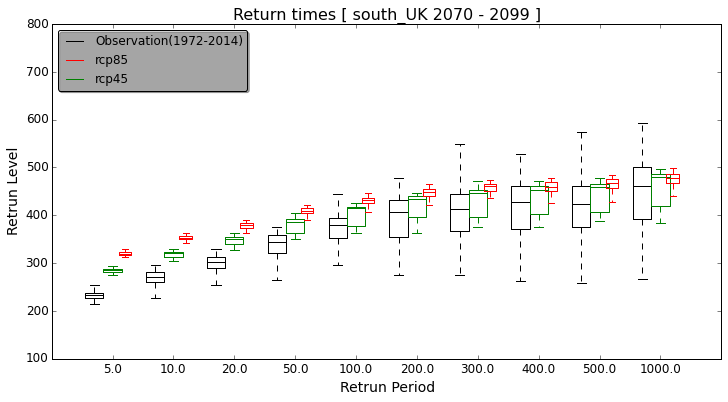

In [32]:

rp = [ 5. ,10. ,20., 50. ,100. ,200., 300., 400. ,500. ,1000. ]
rl_c_obs = []
rl_c_rcp45 = []
rl_c_rcp85 = []
c = 0

start = 2070
end = 2099
region = 'south_UK' # 
#region = 'west_FRA'


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

for T in rp :
    obs = list(obs_12['1972':'2014'].xs([region], level=['region'], axis=1).mean(axis=1).values )#
    rl_obs = ev.rl_bootstrap(obs,T)

    for rcp in pr.columns.levels[1]:
        con = []
        for gcm in pr.columns.levels[4]:
            for rcm in pr.columns.levels[5]:
                y = pr['%i' % (start):'%i' % (end)].xs([region, rcp , gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                if not np.all(np.isnan(y)):
                    con.extend(y)
                    miss= miss+1     
        if '85' in rcp: 
            rl_rcp85 = ev.rl_bootstrap(con,T)
        elif '45' in rcp:
            rl_rcp45 = ev.rl_bootstrap(con,T)
        else: 
            print 'no rcp found'
    if c == 0:        
        rl_c_obs =  rl_obs
        rl_c_rcp45 = rl_rcp45
        rl_c_rcp85 = rl_rcp85
    if c > 0:
        rl_c_obs = np.vstack((rl_c_obs, rl_obs))
        rl_c_rcp45 = np.vstack((rl_c_rcp45, rl_rcp45))
        rl_c_rcp85 = np.vstack((rl_c_rcp85, rl_rcp85))
    c=+1

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(12, 6))

bpl = plt.boxplot(list(rl_c_obs), positions=np.array(xrange(len(rl_c_obs)))*2.0-0.6, sym='', widths=0.6)
bpm = plt.boxplot(list(rl_c_rcp45), positions=np.array(xrange(len(rl_c_obs)))*2.0, sym='', widths=0.6)
bpr = plt.boxplot(list(rl_c_rcp85), positions=np.array(xrange(len(rl_c_obs)))*2.0+0.4, sym='', widths=0.4)
set_box_color(bpl, 'black') # colors are from http://colorbrewer2.org/
set_box_color(bpm, 'green')
set_box_color(bpr, 'red')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='black', label='Observation(1972-2014)')
plt.plot([], c='red', label='rcp85')
plt.plot([], c='green', label='rcp45')
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True)

plt.xticks(xrange(0, len(rp) * 2, 2), rp, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-2, len(rp)*2)
plt.ylim(100, 800)

plt.title('Return times [ %s %i - %i ]' % (region, start, end), fontsize=16)
plt.xlabel('Retrun Period', fontsize=14)
plt.ylabel('Retrun Level', fontsize=14)
# plt.tight_layout()

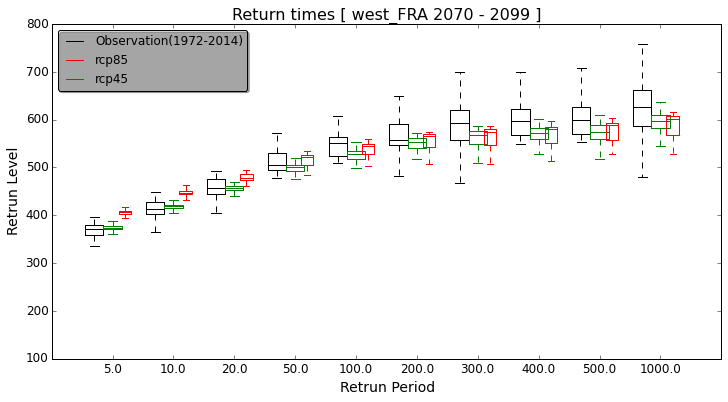

In [33]:
rp = [ 5. ,10. ,20., 50. ,100. ,200., 300., 400. ,500. ,1000. ]
rl_c_obs = []
rl_c_rcp45 = []
rl_c_rcp85 = []
c = 0

start = 2070
end = 2099
#region = 'south_UK' # 
region = 'west_FRA'

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

for T in rp :
    obs = list(obs_12['1972':'2014'].xs([region], level=['region'], axis=1).mean(axis=1).values )#
    rl_obs = ev.rl_bootstrap(obs,T)

    for rcp in pr.columns.levels[1]:
        con = []
        for gcm in pr.columns.levels[4]:
            for rcm in pr.columns.levels[5]:
                y = pr['%i' % (start):'%i' % (end)].xs([region, rcp , gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                if not np.all(np.isnan(y)):
                    con.extend(y)
                    miss= miss+1     
        if '85' in rcp: 
            rl_rcp85 = ev.rl_bootstrap(con,T)
        elif '45' in rcp:
            rl_rcp45 = ev.rl_bootstrap(con,T)
        else: 
            print 'no rcp found'
    if c == 0:        
        rl_c_obs =  rl_obs
        rl_c_rcp45 = rl_rcp45
        rl_c_rcp85 = rl_rcp85
    if c > 0:
        rl_c_obs = np.vstack((rl_c_obs, rl_obs))
        rl_c_rcp45 = np.vstack((rl_c_rcp45, rl_rcp45))
        rl_c_rcp85 = np.vstack((rl_c_rcp85, rl_rcp85))
    c=+1

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(12, 6))

bpl = plt.boxplot(list(rl_c_obs), positions=np.array(xrange(len(rl_c_obs)))*2.0-0.6, sym='', widths=0.6)
bpm = plt.boxplot(list(rl_c_rcp45), positions=np.array(xrange(len(rl_c_obs)))*2.0, sym='', widths=0.6)
bpr = plt.boxplot(list(rl_c_rcp85), positions=np.array(xrange(len(rl_c_obs)))*2.0+0.4, sym='', widths=0.4)
set_box_color(bpl, 'black') # colors are from http://colorbrewer2.org/
set_box_color(bpm, 'green')
set_box_color(bpr, 'red')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='black', label='Observation(1972-2014)')
plt.plot([], c='red', label='rcp85')
plt.plot([], c='green', label='rcp45')
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True)

plt.xticks(xrange(0, len(rp) * 2, 2), rp, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-2, len(rp)*2)
plt.ylim(100, 800)

plt.title('Return times [ %s %i - %i ]' % (region, start, end), fontsize=16)
plt.xlabel('Retrun Period', fontsize=14)
plt.ylabel('Retrun Level', fontsize=14)
# plt.tight_layout()

In [232]:
start=1912
end = 2014
test = list(obs_12['%i' % (start):'%i' % (end)].xs([region], level=['region'], axis=1).mean(axis=1).values)
rl_test = ev.rl_bootstrap(test,T)

In [67]:
setwd("/homel/yiou/ownCloud/documents/EUCLEIA")
RR=scan(file="UK_RR.dat")
II=c(1:length(RR))

## Computation of EVD parameters for RR
RR.fgev=fgev(RR)

plot(RR.fgev,4)

## Return Levels
"RL" = function(T,a,b,s)
  {
    yT= -1/log(1 - 1/T)
    if(s != 0){
      zT= a + b*((yT)^s -1)/s
    }
    else{
      zT= a + b * log(yT)
    }
    return(zT)
  }

T=100
a=RR.fgev$estimate[1]
b=RR.fgev$estimate[2]
s=RR.fgev$estimate[3]

RL0=RL(T,a,b,s)


## Bootstrap for the confidence intervals around RL0
## (return level for 100 years)
nsim=1000
RL.s=c()
for(i in 1:nsim){
  II.s=sort(unique(sample(II,replace=TRUE)))
  RR.s.fgev=fgev(RR[II.s])
  a=RR.s.fgev$estimate[1]
  b=RR.s.fgev$estimate[2]
  s=RR.s.fgev$estimate[3]
  RL.s=c(RL.s,RL(T,a,b,s))
}

RL.s.q=quantile(RL.s,probs=c(0.1,0.9))

boxplot(RL.s)
abline(h=c(RL0,RL.s.q),lwd=c(3,1,1),lty=c(1,2,2))